In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Heart_disease=pd.read_excel("/content/heart_disease.xlsx",sheet_name="Heart_disease")

In [3]:
Heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
Heart_disease.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [5]:
Heart_disease.shape

(908, 13)

In [6]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
Heart_disease.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
Heart_disease.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
Heart_disease.duplicated().sum()

1

In [10]:
Heart_disease.drop_duplicates(inplace=True)


In [11]:

Heart_disease['oldpeak']

,oldpeak
0,2.3
1,0.0
2,0.4
3,0.0
4,1.5
...,...
903,1.5
904,3.0
905,2.5
906,NaN


In [12]:

Heart_disease['oldpeak'].value_counts()

,count
oldpeak,
0.0,357
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
1.4,15


In [13]:
Heart_disease['oldpeak'].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [14]:
Heart_disease['oldpeak'].nunique()


53

<Axes: xlabel='oldpeak'>

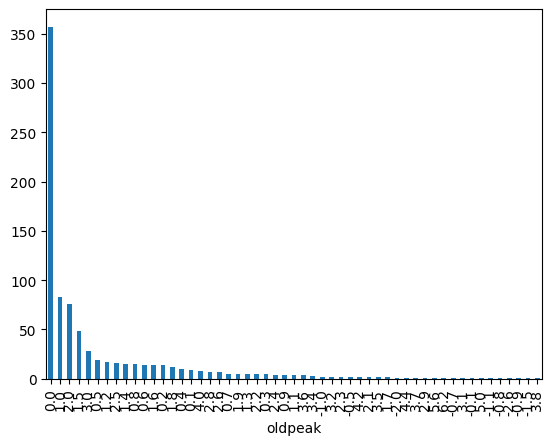

In [15]:
Heart_disease['oldpeak'].value_counts().plot(kind='bar')

In [16]:
#its right skewed data,its numerical data we can replace null values with either mean or median.since median is insensitive to outliers we can replace it with median

In [17]:
Heart_disease['oldpeak'].median()

0.5

In [18]:
Heart_disease['oldpeak'].fillna(Heart_disease['oldpeak'].median(),inplace=True)

In [19]:
Heart_disease['oldpeak']

,oldpeak
0,2.3
1,0.0
2,0.4
3,0.0
4,1.5
...,...
903,1.5
904,3.0
905,2.5
906,0.5


<Axes: >

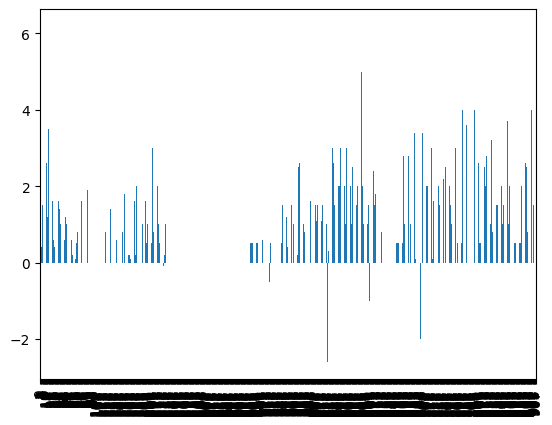

In [20]:
Heart_disease['oldpeak'].plot(kind='bar')

In [21]:
Heart_disease.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [22]:
Heart_disease.shape

(907, 13)

In [23]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


convert categorical data into numerical data by using label encoder, one-hot encoder

In [24]:
Heart_disease['fbs'].unique()

array([ True, False])

In [25]:
Heart_disease['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [26]:
Heart_disease['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [27]:
Heart_disease['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [28]:
Heart_disease['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

Encoding the categorical values in numerical

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [30]:
Heart_disease['cp']=Heart_disease['cp'].astype(str)
Heart_disease['fbs']=Heart_disease['fbs'].astype(str)
Heart_disease['restecg']=Heart_disease['restecg'].astype(str)
Heart_disease['exang']=Heart_disease['exang'].astype(str)
Heart_disease['slope']=Heart_disease['slope'].astype(str)
Heart_disease['thal']=Heart_disease['thal'].astype(str)
Heart_disease['sex']=Heart_disease['sex'].astype(str)

In [31]:
Heart_disease['cp']=le.fit_transform(Heart_disease['cp'])
Heart_disease['fbs']=le.fit_transform(Heart_disease['fbs'])
Heart_disease['restecg']=le.fit_transform(Heart_disease['restecg'])
Heart_disease['exang']=le.fit_transform(Heart_disease['exang'])
Heart_disease['slope']=le.fit_transform(Heart_disease['slope'])
Heart_disease['thal']=le.fit_transform(Heart_disease['thal'])
Heart_disease['sex']=le.fit_transform(Heart_disease['sex'])



In [32]:
Heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [33]:
Heart_disease[['age','trestbps','thalch','oldpeak']]

,age,trestbps,thalch,oldpeak
0,63,145,150,2.3
1,41,135,132,0.0
2,57,140,148,0.4
3,52,118,190,0.0
4,57,110,126,1.5
...,...,...,...,...
903,53,125,120,1.5
904,62,166,120,3.0
905,56,170,123,2.5
906,56,144,105,0.5


In [34]:
Heart_disease.shape

(907, 13)

In [35]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int64  
 2   cp        907 non-null    int64  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int64  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int64  
 11  thal      907 non-null    int64  
 12  num       907 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 99.2 KB


<Axes: ylabel='Frequency'>

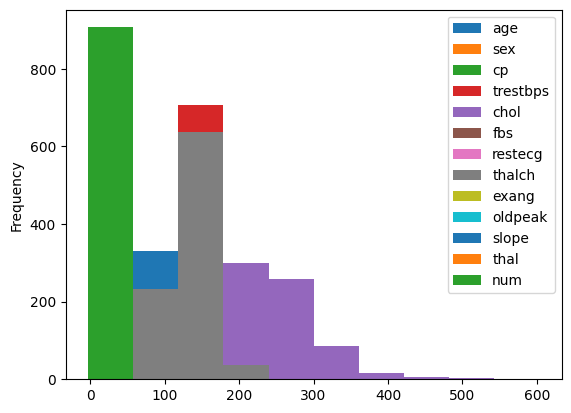

In [36]:
Heart_disease.plot(kind='hist')

<Axes: >

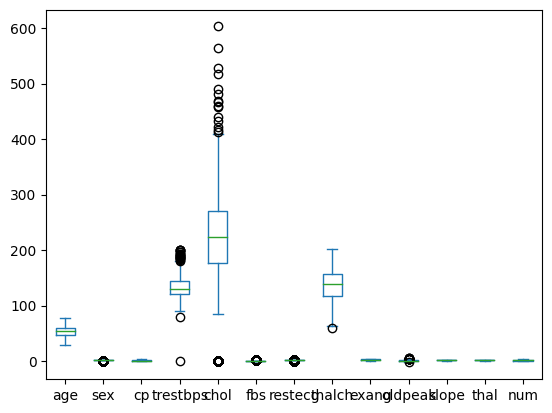

In [37]:
Heart_disease.plot(kind='box')

Isolation Forest

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
clf=IsolationForest(random_state=45,contamination=.01)

In [41]:
clf.fit(Heart_disease)

IsolationForest(contamination=0.01, random_state=45)

In [42]:
y_pred=clf.predict(Heart_disease)

In [43]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [44]:
pd.value_counts(y_pred)

,count
1,897
-1,10


In [45]:
Heart_disease.loc[y_pred==-1,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
10,30,0,3,170,237,0,2,170,1,0.0,0,0,0
231,38,1,2,100,0,1,1,179,1,-1.1,2,0,0
396,55,1,2,196,406,0,2,72,2,0.5,0,0,0
756,38,0,0,105,0,1,1,166,1,2.8,2,2,2
795,56,0,0,200,288,1,0,133,3,4.0,0,2,3
873,74,1,3,196,216,1,1,120,0,0.5,2,2,3
879,60,1,2,186,316,1,2,70,2,0.5,1,0,3
889,63,0,0,150,407,0,0,154,1,4.0,1,2,4
896,76,1,2,104,109,0,0,120,1,3.5,0,1,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4


In [46]:
Heart_disease.shape

(907, 13)

In [47]:
Heart_disease1=Heart_disease.drop(Heart_disease.loc[y_pred==-1,:].index)

In [48]:
Heart_disease1.shape

(897, 13)

In [49]:
Heart_disease1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


Feature engineering

In [50]:
Heart_disease1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.044137,-0.072043,0.255443,-0.109534,0.183001,0.001599,-0.322159,0.158753,0.213006,-0.052225,0.052390,0.317328
sex,0.044137,1.000000,-0.133900,0.022257,-0.192169,0.098352,0.075489,-0.172746,0.161813,0.106514,-0.048622,0.075984,0.272126
cp,-0.072043,-0.133900,1.000000,-0.008722,0.074438,-0.049903,-0.083203,0.261036,-0.360734,-0.171279,0.103314,-0.069360,-0.329261
trestbps,0.255443,0.022257,-0.008722,1.000000,0.102995,0.106762,0.053400,-0.118302,0.101019,0.133850,0.025790,0.062343,0.126182
chol,-0.109534,-0.192169,0.074438,0.102995,1.000000,-0.111696,-0.204624,0.212307,-0.039787,0.031456,0.054706,-0.016663,-0.245424
fbs,0.183001,0.098352,-0.049903,0.106762,-0.111696,1.000000,0.068766,-0.067157,0.004935,0.006192,-0.036066,-0.019423,0.153325
restecg,0.001599,0.075489,-0.083203,0.053400,-0.204624,0.068766,1.000000,-0.192816,0.046869,-0.028101,-0.086661,-0.102306,0.053051
thalch,-0.322159,-0.172746,0.261036,-0.118302,0.212307,-0.067157,-0.192816,1.000000,-0.309277,-0.115910,0.220138,0.000852,-0.325177
exang,0.158753,0.161813,-0.360734,0.101019,-0.039787,0.004935,0.046869,-0.309277,1.000000,0.383980,-0.156625,0.093436,0.350128
oldpeak,0.213006,0.106514,-0.171279,0.133850,0.031456,0.006192,-0.028101,-0.115910,0.383980,1.000000,-0.179407,0.082597,0.392331


In [51]:
Heart_disease1.corr()['num'].sort_values(ascending=False)

,num
num,1.000000
oldpeak,0.392331
exang,0.350128
age,0.317328
sex,0.272126
fbs,0.153325
trestbps,0.126182
thal,0.122762
restecg,0.053051
slope,-0.142391


<Axes: >

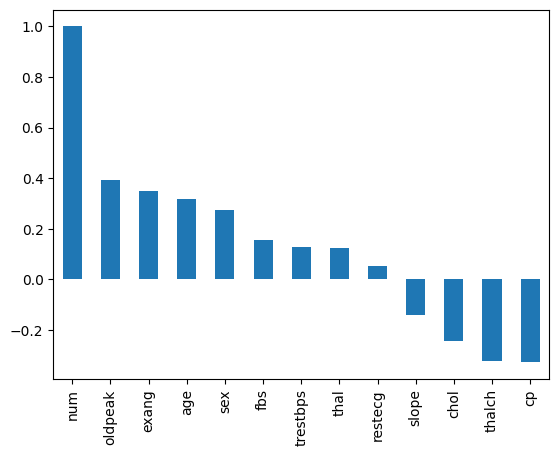

In [52]:
Heart_disease1.corr()['num'].sort_values(ascending=False).plot(kind='bar')

In [53]:
Heart_disease1['num']

,num
0,0
1,0
2,0
3,0
4,0
...,...
902,4
903,4
904,4
906,4


In [54]:
Heart_disease1['num'].shape

(897,)

In [55]:
Heart_disease2=Heart_disease1.drop('num',axis=1)

In [56]:
Heart_disease2.shape

(897, 12)

In [57]:

Heart_disease2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.3,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0


In [58]:
Heart_disease2.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
902,62,1,0,160,254,1,2,108,3,3.0,1,1
903,53,1,0,125,0,0,1,120,1,1.5,2,2
904,62,1,0,166,170,0,2,120,3,3.0,1,2
906,56,1,2,144,208,1,2,105,2,0.5,0,0
907,57,1,0,142,277,1,2,182,0,0.5,1,2


In [59]:
x=Heart_disease2

In [60]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.3,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,62,1,0,160,254,1,2,108,3,3.0,1,1
903,53,1,0,125,0,0,1,120,1,1.5,2,2
904,62,1,0,166,170,0,2,120,3,3.0,1,2
906,56,1,2,144,208,1,2,105,2,0.5,0,0


In [61]:
x.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [62]:
y=Heart_disease1['num']

In [63]:
y.shape

(897,)

Decision Tree Classification

In [64]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=40,shuffle=True)

In [65]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
821,45,1,0,142,309,0,0,147,3,0.0,1,2
523,60,1,0,100,248,0,1,125,1,1.0,1,1
385,62,1,1,118,0,0,1,138,0,0.5,1,1
460,62,1,0,120,267,0,1,99,3,1.8,1,2
869,49,1,2,137,142,0,1,68,0,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
443,58,1,0,120,0,0,0,106,3,1.5,0,2
166,68,1,2,118,277,0,1,151,1,1.0,2,2
7,48,1,2,110,211,0,1,138,1,0.0,0,0
220,54,1,1,160,195,0,2,130,1,1.0,2,2


In [66]:
x_train.shape

(717, 12)

In [67]:
y_train

,num
821,3
523,1
385,0
460,1
869,3
...,...
443,1
166,0
7,0
220,0


In [68]:
y_train.shape

(717,)

feature selection using decision tree classifier

In [69]:
x=Heart_disease2
y=Heart_disease1['num']
#feature extraction
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)


[0.13890411 0.02140402 0.1349941  0.10691032 0.17438764 0.02461659
 0.03461467 0.12324477 0.03454137 0.12680818 0.03792979 0.04164442]


In [70]:
Heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [71]:
x.drop(['sex','fbs','restecg','exang','slope','thal'],axis=1,inplace=True)

In [73]:
x.head()

,age,cp,trestbps,chol,thalch,oldpeak
0,63,3,145,233,150,2.3
1,41,1,135,203,132,0.0
2,57,0,140,192,148,0.4
3,52,3,118,186,190,0.0
4,57,0,110,201,126,1.5


In [ ]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42,shuffle=True)

In [82]:
x_train.shape

(717, 6)

In [83]:
x_train.head()

,age,cp,trestbps,chol,thalch,oldpeak
877,69,0,154,289,128,0.5
743,63,0,140,260,112,3.0
233,48,1,180,308,125,2.0
390,62,3,134,139,96,0.5
119,56,1,120,236,178,0.8


Building Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [78]:
from sklearn import tree

In [79]:
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

[Text(0.5020833333333333, 0.9166666666666666, 'x[1] <= 0.5\nentropy = 1.921\nsamples = 717\nvalue = [309, 215, 90, 84, 19]'),
 Text(0.26666666666666666, 0.75, 'x[0] <= 50.5\nentropy = 2.062\nsamples = 393\nvalue = [76, 162, 72, 66, 17]'),
 Text(0.384375, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'x[3] <= 170.0\nentropy = 1.649\nsamples = 115\nvalue = [33.0, 63.0, 9.0, 8.0, 2.0]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[5] <= 1.55\nentropy = 2.003\nsamples = 25\nvalue = [3, 11, 5, 5, 1]'),
 Text(0.03333333333333333, 0.25, 'x[5] <= 0.1\nentropy = 1.681\nsamples = 20\nvalue = [2, 11, 3, 4, 0]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 1.73\nsamples = 12\nvalue = [2, 6, 3, 1, 0]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.954\nsamples = 8\nvalue = [0, 5, 0, 3, 0]'),
 Text(0.1, 0.25, 'x[2] <= 112.5\nentropy = 1.922\nsamples = 5\nvalue = [1, 0, 2, 1, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 1.0\ns

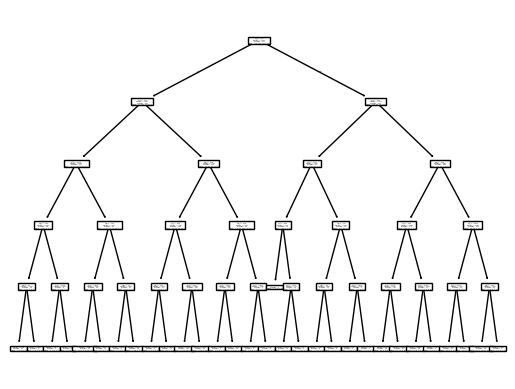

In [80]:
tree.plot_tree(model)

In [81]:
# prompt: predict the values of training and testing data and calculate the accuracies

# Predicting the values of training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculating the accuracies
accuracy_train = round(model.score(x_train, y_train) * 100, 2)
accuracy_test = round(model.score(x_test, y_test) * 100, 2)

# Print the results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 62.48
Testing Accuracy: 51.67


In [84]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [85]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculating the accuracies
accuracy_train = round(model.score(x_train, y_train) * 100, 2)
accuracy_test = round(model.score(x_test, y_test) * 100, 2)

# Print the results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 72.52
Testing Accuracy: 52.22


In [86]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculating the accuracies
accuracy_train = round(model.score(x_train, y_train) * 100, 2)
accuracy_test = round(model.score(x_test, y_test) * 100, 2)

# Print the results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 100.0
Testing Accuracy: 45.0


In [88]:
model= DecisionTreeClassifier(criterion='gini',max_depth=None)
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculating the accuracies
accuracy_train = round(model.score(x_train, y_train) * 100, 2)
accuracy_test = round(model.score(x_test, y_test) * 100, 2)

# Print the results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 100.0
Testing Accuracy: 44.44


In [90]:
model= DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [91]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculating the accuracies
accuracy_train = round(model.score(x_train, y_train) * 100, 2)
accuracy_test = round(model.score(x_test, y_test) * 100, 2)

# Print the results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 72.66
Testing Accuracy: 47.22


cross validation

In [92]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
results = cross_val_score(model, x, y, cv=kfold)
print(results)


[0.52222222 0.6        0.30726257 0.2849162  0.03910615]


In [93]:
from sklearn.metrics import accuracy_score

In [94]:
training_acc=[]
testing_acc=[]

for i in range(1,100):
    model= DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(x_train,y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred=model.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_train_pred))
    testing_acc.append(accuracy_score(y_test,y_test_pred))

import numpy as np
print("cross validation-Training accuracy:",np.mean(training_acc).round(2))
print("cross validation-Testing accuracy:",np.mean(testing_acc).round(2))

cross validation-Training accuracy: 0.97
cross validation-Testing accuracy: 0.46


[Text(0.5306470274719344, 0.9722222222222222, 'x[1] <= 0.5\nentropy = 1.921\nsamples = 717\nvalue = [309, 215, 90, 84, 19]'),
 Text(0.27967974147236613, 0.9166666666666666, 'x[0] <= 50.5\nentropy = 2.062\nsamples = 393\nvalue = [76, 162, 72, 66, 17]'),
 Text(0.4051633844721503, 0.9444444444444444, 'True  '),
 Text(0.08354922279792747, 0.8611111111111112, 'x[3] <= 170.0\nentropy = 1.649\nsamples = 115\nvalue = [33.0, 63.0, 9.0, 8.0, 2.0]'),
 Text(0.04231433506044905, 0.8055555555555556, 'x[5] <= 1.55\nentropy = 2.003\nsamples = 25\nvalue = [3, 11, 5, 5, 1]'),
 Text(0.025906735751295335, 0.75, 'x[5] <= 0.1\nentropy = 1.681\nsamples = 20\nvalue = [2, 11, 3, 4, 0]'),
 Text(0.013816925734024179, 0.6944444444444444, 'x[4] <= 153.0\nentropy = 1.73\nsamples = 12\nvalue = [2, 6, 3, 1, 0]'),
 Text(0.0069084628670120895, 0.6388888888888888, 'x[0] <= 40.5\nentropy = 1.53\nsamples = 9\nvalue = [2, 4, 3, 0, 0]'),
 Text(0.0034542314335060447, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [

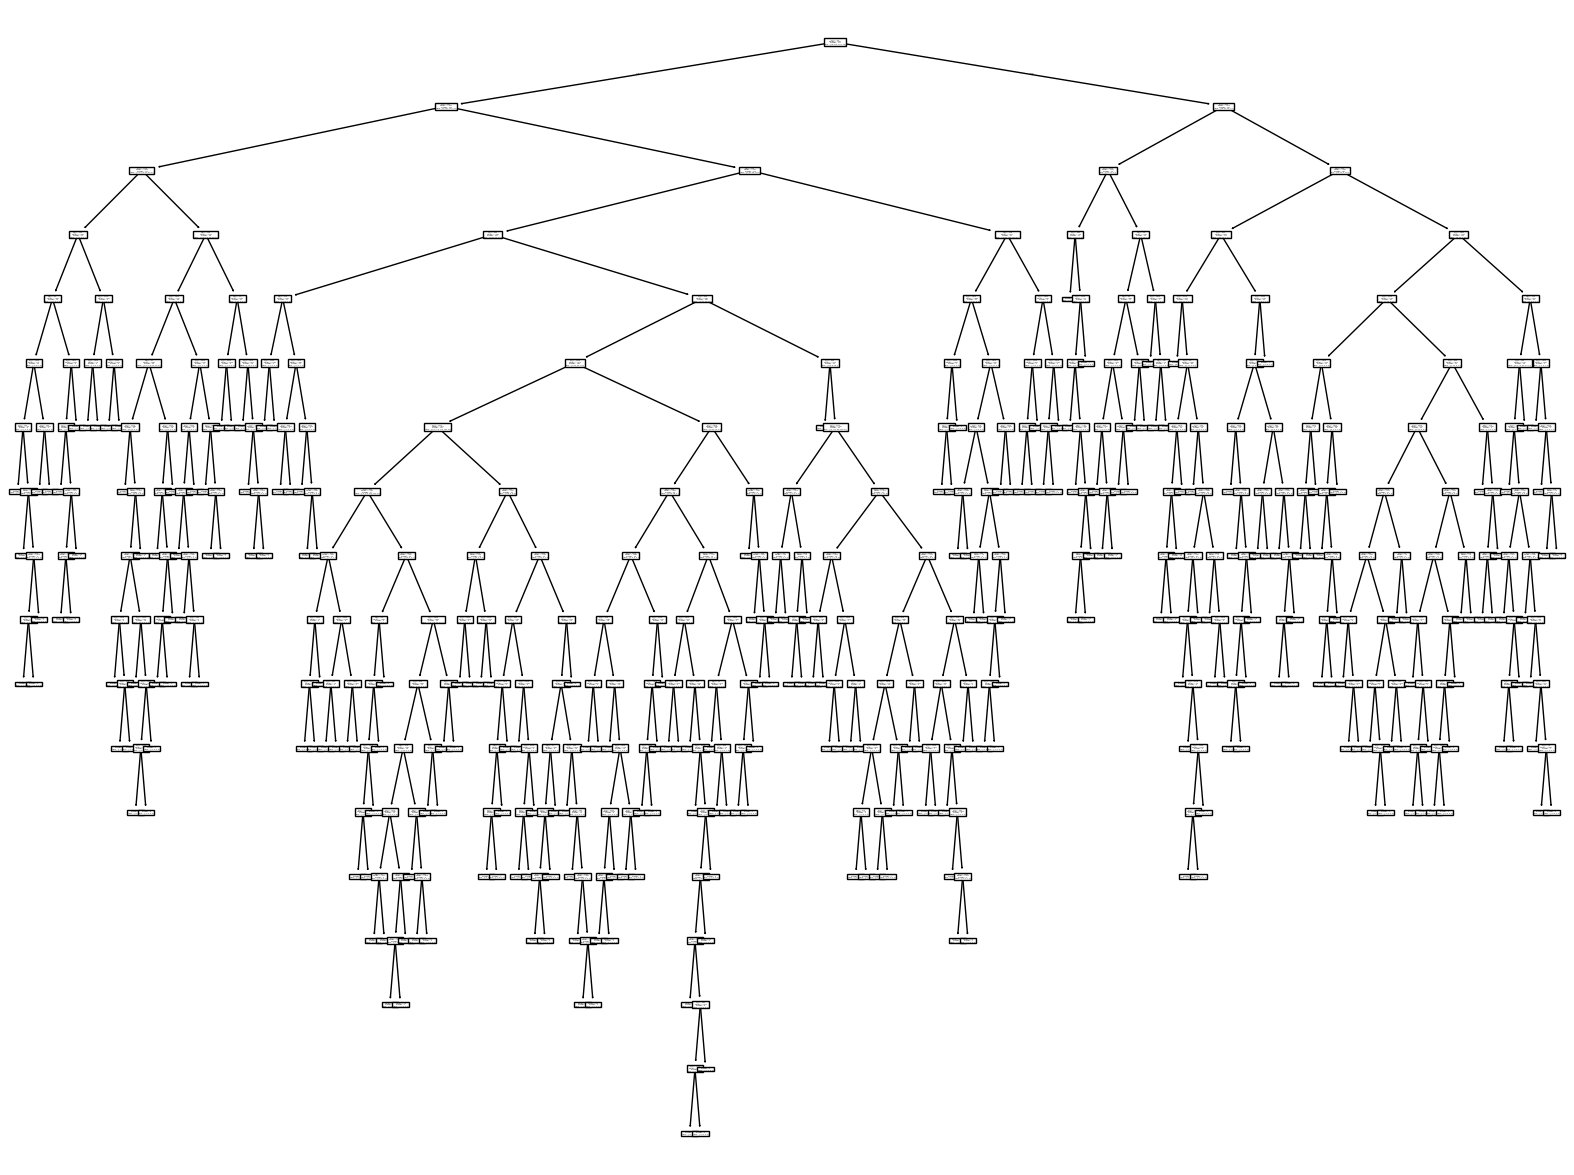

In [95]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model)

In [96]:
preds=model.predict(x_test)

In [97]:
preds

array([0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 3, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 3, 0, 2, 2, 1,
       0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 3, 4,
       0, 0, 3, 1, 0, 0, 3, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 2, 3, 2,
       0, 0, 1, 0, 3, 0, 1, 0, 0, 2, 1, 4, 1, 1, 4, 0, 3, 2, 0, 2, 3, 2,
       0, 1, 0, 3, 1, 1, 1, 0, 2, 3, 4, 0, 0, 0, 3, 1, 4, 0, 1, 4, 0, 0,
       1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 0, 1, 3, 1, 3, 1, 3,
       1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 4, 0, 2, 0, 1, 0, 3, 0, 0,
       1, 1, 2, 0])

In [98]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [99]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66        87
           1       0.28      0.26      0.27        50
           2       0.12      0.18      0.14        17
           3       0.26      0.30      0.28        20
           4       0.00      0.00      0.00         6

    accuracy                           0.43       180
   macro avg       0.27      0.27      0.27       180
weighted avg       0.46      0.43      0.44       180



In [100]:
print(confusion_matrix(y_test,preds))

[[55 20  7  4  1]
 [15 13 10  8  4]
 [ 3  7  3  4  0]
 [ 4  5  3  6  2]
 [ 2  1  2  1  0]]


In [101]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       215
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717



In [102]:
print(confusion_matrix(y_train,y_train_pred))

[[309   0   0   0   0]
 [  0 215   0   0   0]
 [  0   0  90   0   0]
 [  0   0   0  84   0]
 [  0   0   0   0  19]]


<Axes: >

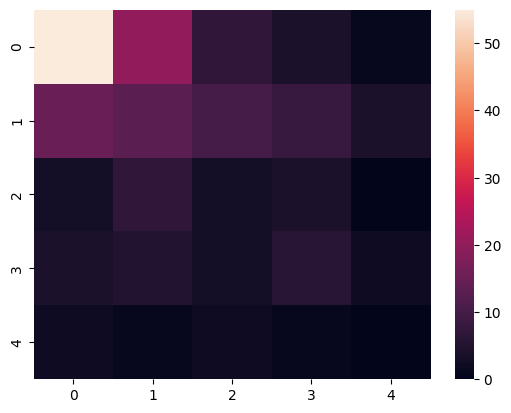

In [103]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,preds))

test value  very less the model is under fit, we can try  to fit in logistic regression

what are the hyper parameter techniques?
ans)criterion-Gini,entropy,
max-depth,minimum_samples_split,mimimum_samples_leaf
max_features

what is the difference between label encoding and one hot encoding?
Ans)one-hotencoding is representation of categorical variables as binary vectors
label encoding is converting labels/words in numerical forms